# Musterlösung - Übungen zu Clustering mit k-Means

> Führen Sie den k-Means Algorithmus mit R auf den Standarddatensatz `USArrests` durch und beantworten Sie die gestellten Fragen. <br> Der Datensatz liefert dabei Verbrechensdaten aus den USA.

## Aufgabe 1

Binden Sie alle notwendigen Bibliotheken ein und lade den Standarddatensatz `USArrests` als Dataframe ein. <br>
Wieviele Merkmalswerte liegen bei diesem Datensatz vor? <br>
Wieviele Einträge hat jeder Merkmalswert? Welche Bedeutung hat diese Zahl? <br>
Welcher Merkmalswert hat den höchsten Mittelwert?

In [ ]:
install.packages(c("cluster", "factoextra"))

In [1]:
library(factoextra)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
require("datasets")
data("USArrests")
df <- USArrests

In [3]:
str(df)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


In [4]:
summary(df)

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

### Antworten

Es gibt insgesamt vier Merkmalselemente, die jeweils einer Verbrechensart entsprechen (z.B. Mord). <br>
Es gibt jeweils 50 Einträge je Merkmalelement. Diese 50 repräsentieren die 50 Bundesstaaten in den USA. <br>
Der höchste Mittelwert liegt bei Körperverletzung/Beleidigung vor. Dieser beträgt 170,8.

## Aufgabe 2

Lassen Sie sich die ersten Datensätze anzeigen. Was könnte an den Werten problematisch sein? <br>
Führen Sie nachfolgend, dann die "Verbesserung" durch und überprüfen diese anhand der ersten Datensätze.

In [5]:
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


## Antworten

Die Werte sind nicht standardisiert, deshalb sollte eine Normalisierung durchgeführt werden. <br>
Nachfolgend sind die Werte dann im Bereich 0 bis 1.

In [6]:
normalize <- function(x){
  return ((x-min(x))/(max(x)-min(x)))
}

df$Murder<- normalize(df$Murder)
df$Assault<- normalize(df$Assault)
df$UrbanPop<- normalize(df$UrbanPop)
df$Rape<- normalize(df$Rape)
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,0.7469880,0.6541096,0.4406780,0.3591731
Alaska,0.5542169,0.7465753,0.2711864,0.9612403
Arizona,0.4397590,0.8527397,0.8135593,0.6124031
Arkansas,0.4819277,0.4965753,0.3050847,0.3152455
California,0.4939759,0.7910959,1.0000000,0.8604651
Colorado,0.4277108,0.5445205,0.7796610,0.8113695


## Aufgabe 3

Bestimmen Sie, anhand der Ellenbogenmethode, die optimale Anzahl an Cluster/Gruppen. <br>
Führen Sie im nächsten Schritt den k-Means-Algorithmus durch und speichern Sie das Ergebnis. <br>
Wieviele Elemente wurden der Gruppe 3 zugeordnet? <br>
Welcher Gruppe ist Ohio zugeordnet? <br>
Wieviel beträgt die Hetorogenität aller Cluster (in %)?

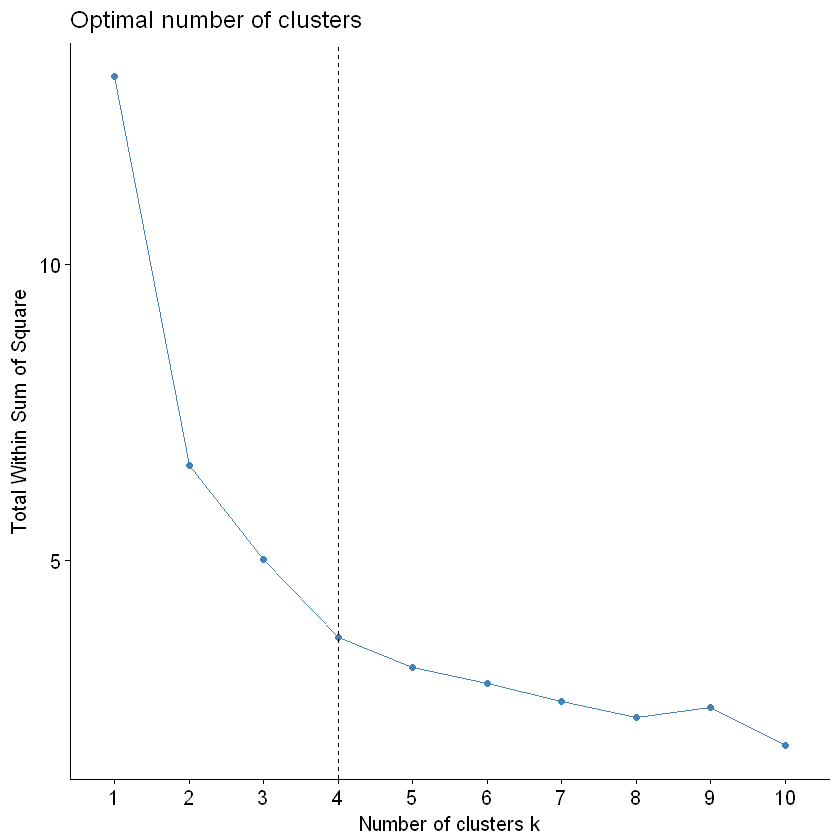

In [7]:
fviz_nbclust(df, kmeans, method = "wss") +
geom_vline(xintercept = 4, linetype = 2)

In [8]:
result <- kmeans(df, 4, nstart=25)

Die nachfolgenden Antworten könnne je nach gewählten k abweichen.

In [11]:
result$size

[1] 13 17 12  8

In [10]:
result$cluster

Alabama         Alaska        Arizona       Arkansas     California 
             4              3              3              4              3 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             3              2              2              3              4 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              1              3              2              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              1              4              1              3 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              3              1              4              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             1              1              3              1              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             3              3              4              1              2 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              2              2              4 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             1              4              3              2              1 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              1              1              2

In [12]:
per <- result$betweens / result$totss
per

[1] 0.7206142

## Antworten

Der dritten Gruppe sind insgesamt 12 Bundesstaaten zugeordnet. <br>
Der Bundestaat Ohio ist der zweiten Gruppe zugeordnet. <br>
Die Hetorogenität beträgt ca. 72% zwischen den Clustern.

## Aufgabe 4

Lassen Sie sich die absoluten Durschnittswerte aller Cluster anzeigen. <br>
Welche Verbrechensart kommt am wenigstens bei Gruppe 2 vor? <br>
Hinweis: Nutze die Funktion `aggregate`.

In [13]:
aggregate(USArrests, by=list(cluster=result$cluster), mean)

cluster,Murder,Assault,UrbanPop,Rape
1,3.600000,78.53846,52.07692,12.17692
2,5.852941,141.17647,73.64706,19.33529
3,10.966667,264.00000,76.50000,33.60833
4,13.937500,243.62500,53.75000,21.41250


## Antworten

Mord kommt mit fast 6 Fällen am wenigsten in Gruppe 2 vor.

## Aufgabe 5

Lassen Sie die Cluster graphisch darstellen. <br>
Hinweis: Nutze die Funktion `fviz_cluster`.

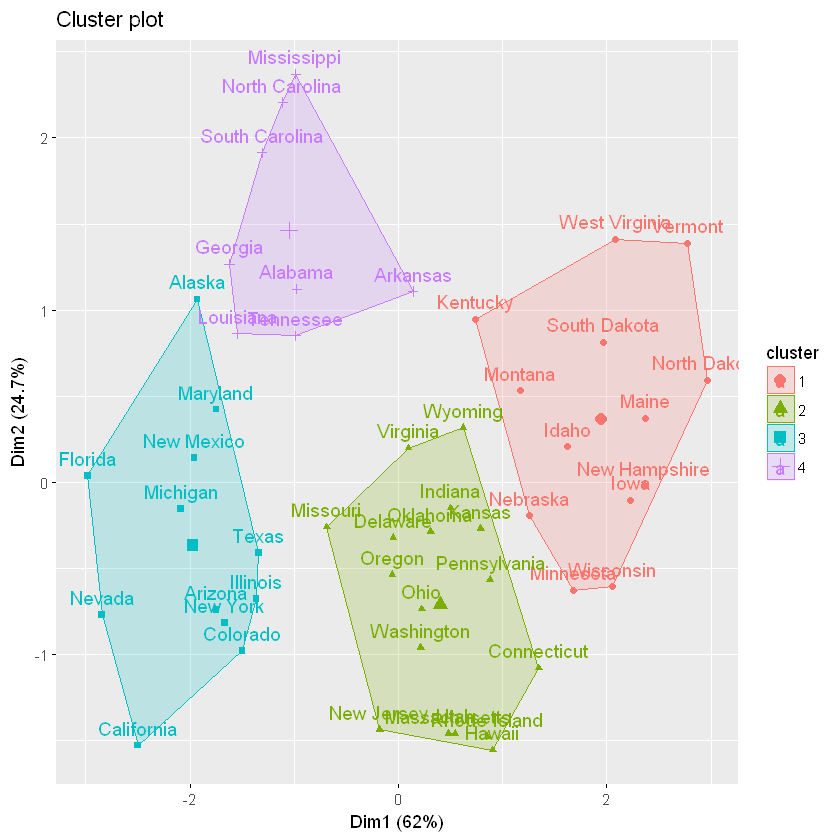

In [15]:
fviz_cluster(result,data=df)